# Model Performance Analysis

#### Here, we step-by-step analyze the performance of all the trained models

AUC could be interpreted as the probabilty of the model to predict target class with higher probability than the other class. It is also completely robust to probability threshold changes for predicting target class. Hence, for measuring model performance, we are choosing AUC as our main metric!

#### We do our analysis in the following way:-
1. Compare the performance of 5-layer-deep CNN models with Global Max Pooling, Global Average Pooling and Flattening layer to see which layer performs the best
2. Compare the model performance as a function of #CNN layers with the help of 3, 5 and 7 layer-deep trained CNN model
3. Compare the performance of the models trained using Transfer Learning like ResNet50, InceptionV3, MobileNet and ResNet152
4. Choose the final model with highest validation AUC (without overfitting on training set) for threshold caliberation and testing

#### Relevant Conclusions :-
1. For the final layer in CNN, Global Max Pooling layers gives best performance out of Global Average Pooling and direct Flattening layer
2. The model underfits with 3 layer depth and overfits with 7 layer depth. 5 layered CNN gives the best learning performance
3. Trainable InceptionV3 gives the highest validation AUC, followed by Trainable MobileNet and ResNet152 with frozen layers
4. Out of all the trained models, the best performance is given by 5-layer-deep CNN model with GlobalMaxPooling layer at 7th epoch. This model gives the best AUC without overfitting on the training set!

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [16]:

def plot_individual_model_metrics(logs_list, model_names):
    num_models = len(logs_list)
    fig, axes = plt.subplots(2, num_models, figsize=(6 * num_models, 10))

    # ----- Step 1: Compute y-limits for each metric row -----
    all_losses = []
    all_aucs = []
    for log in logs_list:
        all_losses.extend(log['loss'].values)
        all_losses.extend(log['val_loss'].values)
        all_aucs.extend(log['auc'].values)
        all_aucs.extend(log['val_auc'].values)

    loss_min, loss_max = min(all_losses), max(all_losses)
    auc_min, auc_max = min(all_aucs), max(all_aucs)

    # ----- Step 2: Plot -----
    for idx, (log, name) in enumerate(zip(logs_list, model_names)):
        # --- Loss ---
        axes[0, idx].plot(log['loss'], label='Train Loss')
        axes[0, idx].plot(log['val_loss'], label='Val Loss', linestyle='--')
        axes[0, idx].set_title(f'{name} - Loss')
        axes[0, idx].set_xlabel('Epoch')
        axes[0, idx].set_ylabel('Loss')
        axes[0, idx].legend()
        axes[0, idx].grid(True)
        axes[0, idx].set_ylim(loss_min, loss_max)

        # --- AUC ---
        axes[1, idx].plot(log['auc'], label='Train AUC')
        axes[1, idx].plot(log['val_auc'], label='Val AUC', linestyle='--')
        axes[1, idx].set_title(f'{name} - AUC')
        axes[1, idx].set_xlabel('Epoch')
        axes[1, idx].set_ylabel('AUC')
        axes[1, idx].legend()
        axes[1, idx].grid(True)
        axes[1, idx].set_ylim(auc_min, auc_max)

    plt.tight_layout()
    plt.show()


# 5-layer CNN models with different final CNN layers

In [13]:
L5_globalmaxpooling_filepath = 'final_models/L5_max_pool_v2/L5_max_pool_v2_log.csv'
L5_globalavgpooling_filepath = 'final_models/L5_avg_pool/L5_avg_pool_log.csv'
L5_flatten_filepath = 'final_models/L5_flat/L5_flat_log.csv'

cols = ['epoch','auc','val_auc','loss','val_loss']

L5_globalmaxpooling = pd.read_csv(L5_globalmaxpooling_filepath, usecols = cols)
L5_globalavgpooling = pd.read_csv(L5_globalavgpooling_filepath, usecols = cols)
L5_flatten = pd.read_csv(L5_flatten_filepath, usecols = cols)

L5_globalmaxpooling.head()

,epoch,auc,loss,val_auc,val_loss
0,0,0.76,0.54,0.85,0.45
1,1,0.83,0.47,0.87,0.43
2,2,0.84,0.45,0.88,0.41
3,3,0.86,0.43,0.88,0.40
4,4,0.87,0.42,0.89,0.40


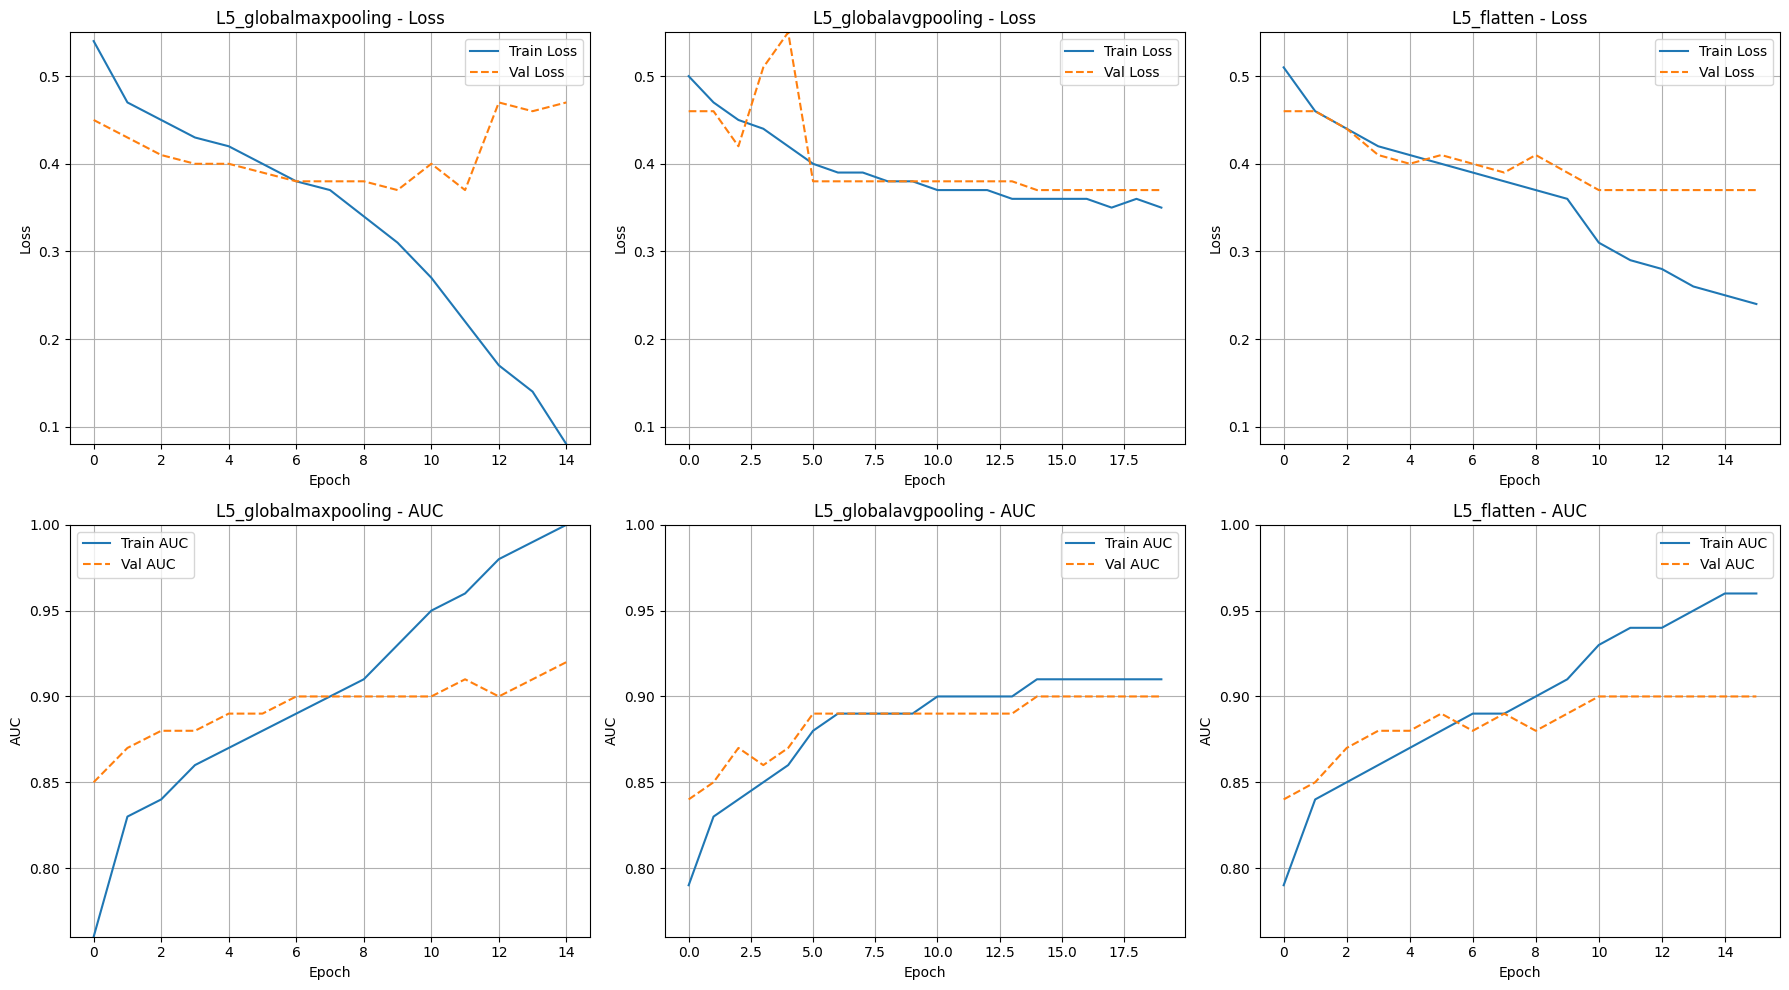

In [17]:
plot_individual_model_metrics([L5_globalmaxpooling,L5_globalavgpooling,L5_flatten],['L5_globalmaxpooling','L5_globalavgpooling','L5_flatten'])

#### We have the following observations here :-
1. With increased epoch, the training loss is gradually decreasing and the training auc is gradually increasing for all the models
2. The Global Average Pooling model has the highest training loss towards the end. It is because the learning rate got reduced due to ReduceLRPlateau callback to prevent overfitting
3. The Global Max Pooling model has the least training loss towards the end, conveying this model was able to learn training set better than the rest two. Also, we can see that during epoch 6-8, this model's training metrics were around validation matrics with the auc_value ~0.9!
4. The Flattening model eventually leads to overfitting, leads to lowered learning of the training set

<b>We can say that the Global Max Pooling layer has worked best for classification as it gave the best performance (0.9 AUC) with minimal overfitting towards the middle epochs</b>

Going forward, we will use Global Max Pooling as the final CNN layer

Let's see, see the effect of layer_depth on model performance!

# Layer Depth Analysis on Model Performance

In [19]:
L3_globalmaxpooling_filepath = 'final_models/L3_max_pool/L3_max_pool_log.csv'
L5_globalmaxpooling_filepath = 'final_models/L5_max_pool_v2/L5_max_pool_v2_log.csv'
L7_globalmaxpooling_filepath = 'final_models/L7_max_pool/L7_max_pool_log.csv'

cols = ['epoch','auc','val_auc','loss','val_loss']

L3_globalmaxpooling = pd.read_csv(L3_globalmaxpooling_filepath, usecols = cols)
L5_globalmaxpooling = pd.read_csv(L5_globalmaxpooling_filepath, usecols = cols)
L7_globalmaxpooling = pd.read_csv(L7_globalmaxpooling_filepath, usecols = cols)


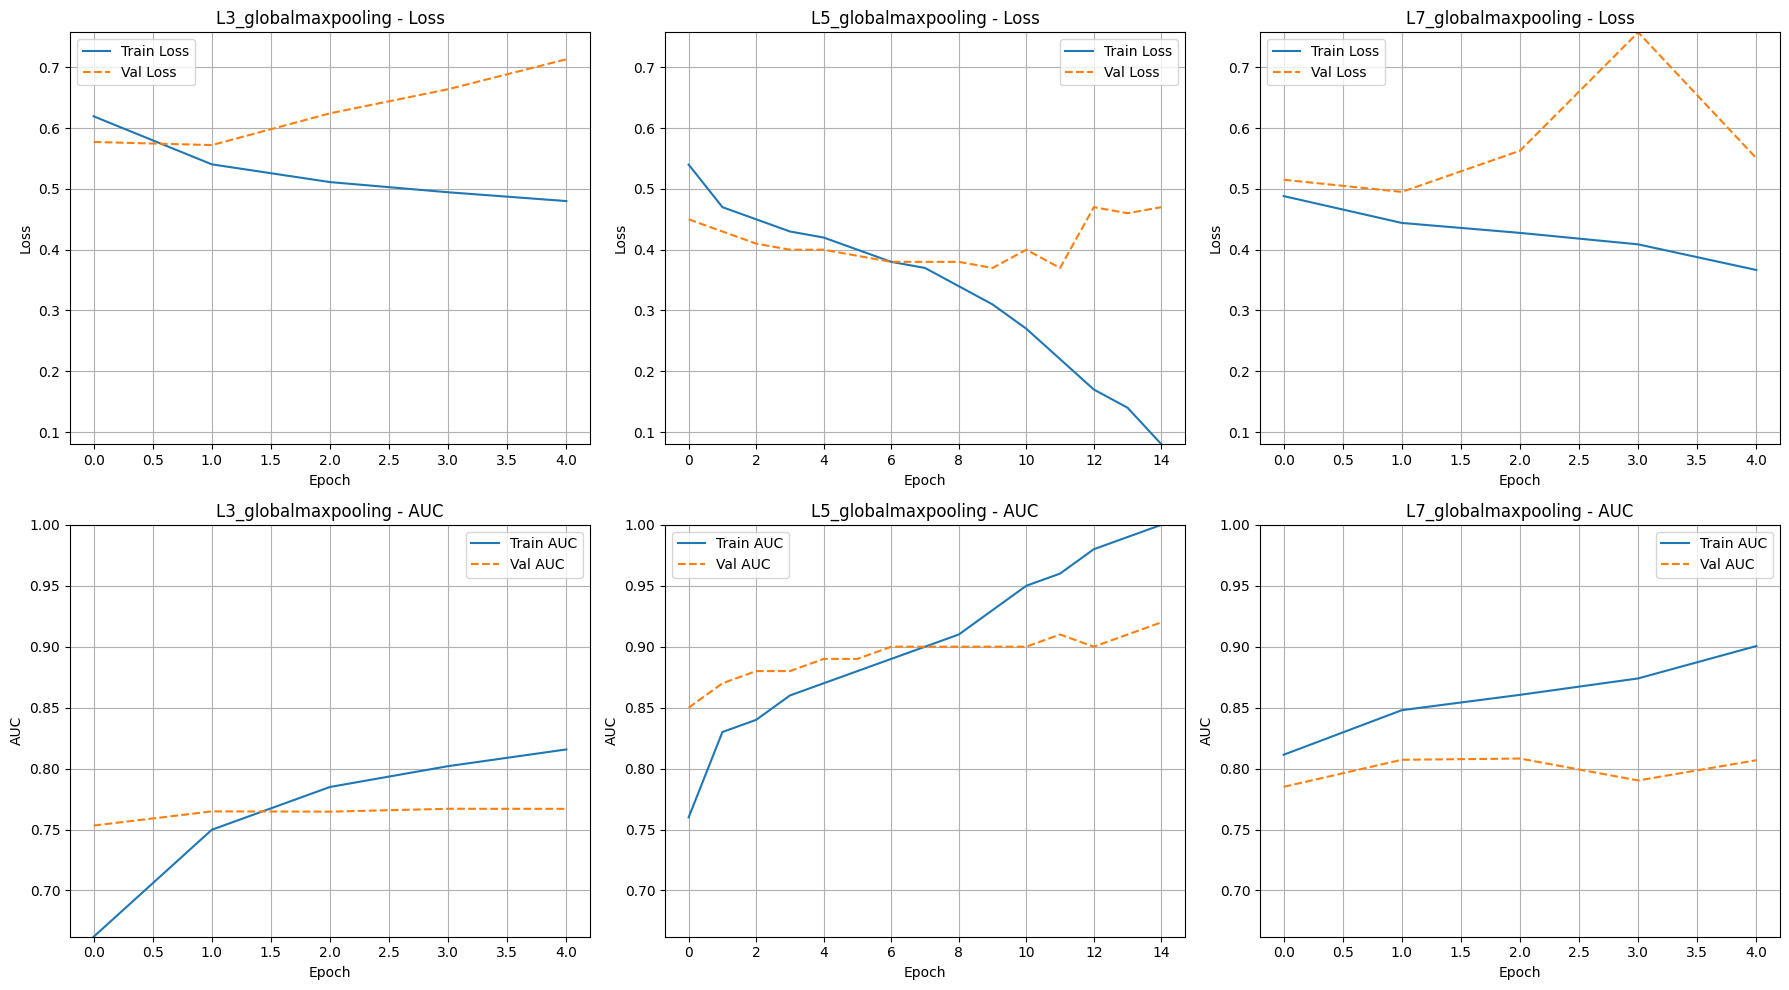

In [20]:
plot_individual_model_metrics([L3_globalmaxpooling,L5_globalmaxpooling,L7_globalmaxpooling],['L3_globalmaxpooling','L5_globalmaxpooling','L7_globalmaxpooling'])

#### Observations :-
1. With 3 CNN layers, the model is unable to learn the general features of the dataset. This could be seen as validation loss is continously increasing with epochs. Hence, the training stopped early due to EarlyStopping callback function
2. With 7 CNN layers, the model seems to overfit the training set very early. This could be because of the increased number of parameters than necessary
3. With 5 CNN layers, the models seems to learn the training set well as the training loss is decreasing gradually. Also, The model seems to overfit after 8th epoch. But still in this case, the validation metrics remain almost stagant.

<i>In conclusion, 5 CNN layer model is working best in our use-case!</i>

# Transfer Learning Analysis

In [30]:
resnet50_trainable_filepath = 'final_models/resnet50_trainable/resnet50_trainable_log.csv'
resnet50_untrainable_filepath = 'final_models/resnet50_untrainable/resnet50_untrainable_log.csv'
mobilenet_trainable_filepath = 'final_models/mobilenet_trainable/mobilenet_trainable_log.csv'
mobilenet_untrainable_filepath = 'final_models/mobilenet_untrainable/mobilenet_untrainable_log.csv'
inceptionv3_trainable_filepath = 'final_models/inceptionv3_trainable/inceptionv3_trainable_log.csv'
inceptionv3_untrainable_filepath = 'final_models/inceptionv3_model_untrainable/inceptionv3_model_untrainable_log.csv'
resnet152_untrainable_filepath = 'final_models/resnet152_untrainable_model/resnet152_untrainable_model_log.csv'

cols = ['epoch','auc','val_auc','loss','val_loss']

resne50t_trainable = pd.read_csv(resnet50_trainable_filepath, usecols = cols)
resnet50_untrainable = pd.read_csv(resnet50_untrainable_filepath, usecols = cols)
mobilenet_trainable = pd.read_csv(mobilenet_trainable_filepath, usecols = cols)
mobilenet_untrainable = pd.read_csv(mobilenet_untrainable_filepath, usecols = cols)
inceptionv3_trainable = pd.read_csv(inceptionv3_trainable_filepath, usecols = cols)
inceptionv3_untrainable = pd.read_csv(inceptionv3_untrainable_filepath, usecols = cols)
resnet152_untrainable = pd.read_csv(resnet152_untrainable_filepath, usecols = cols)


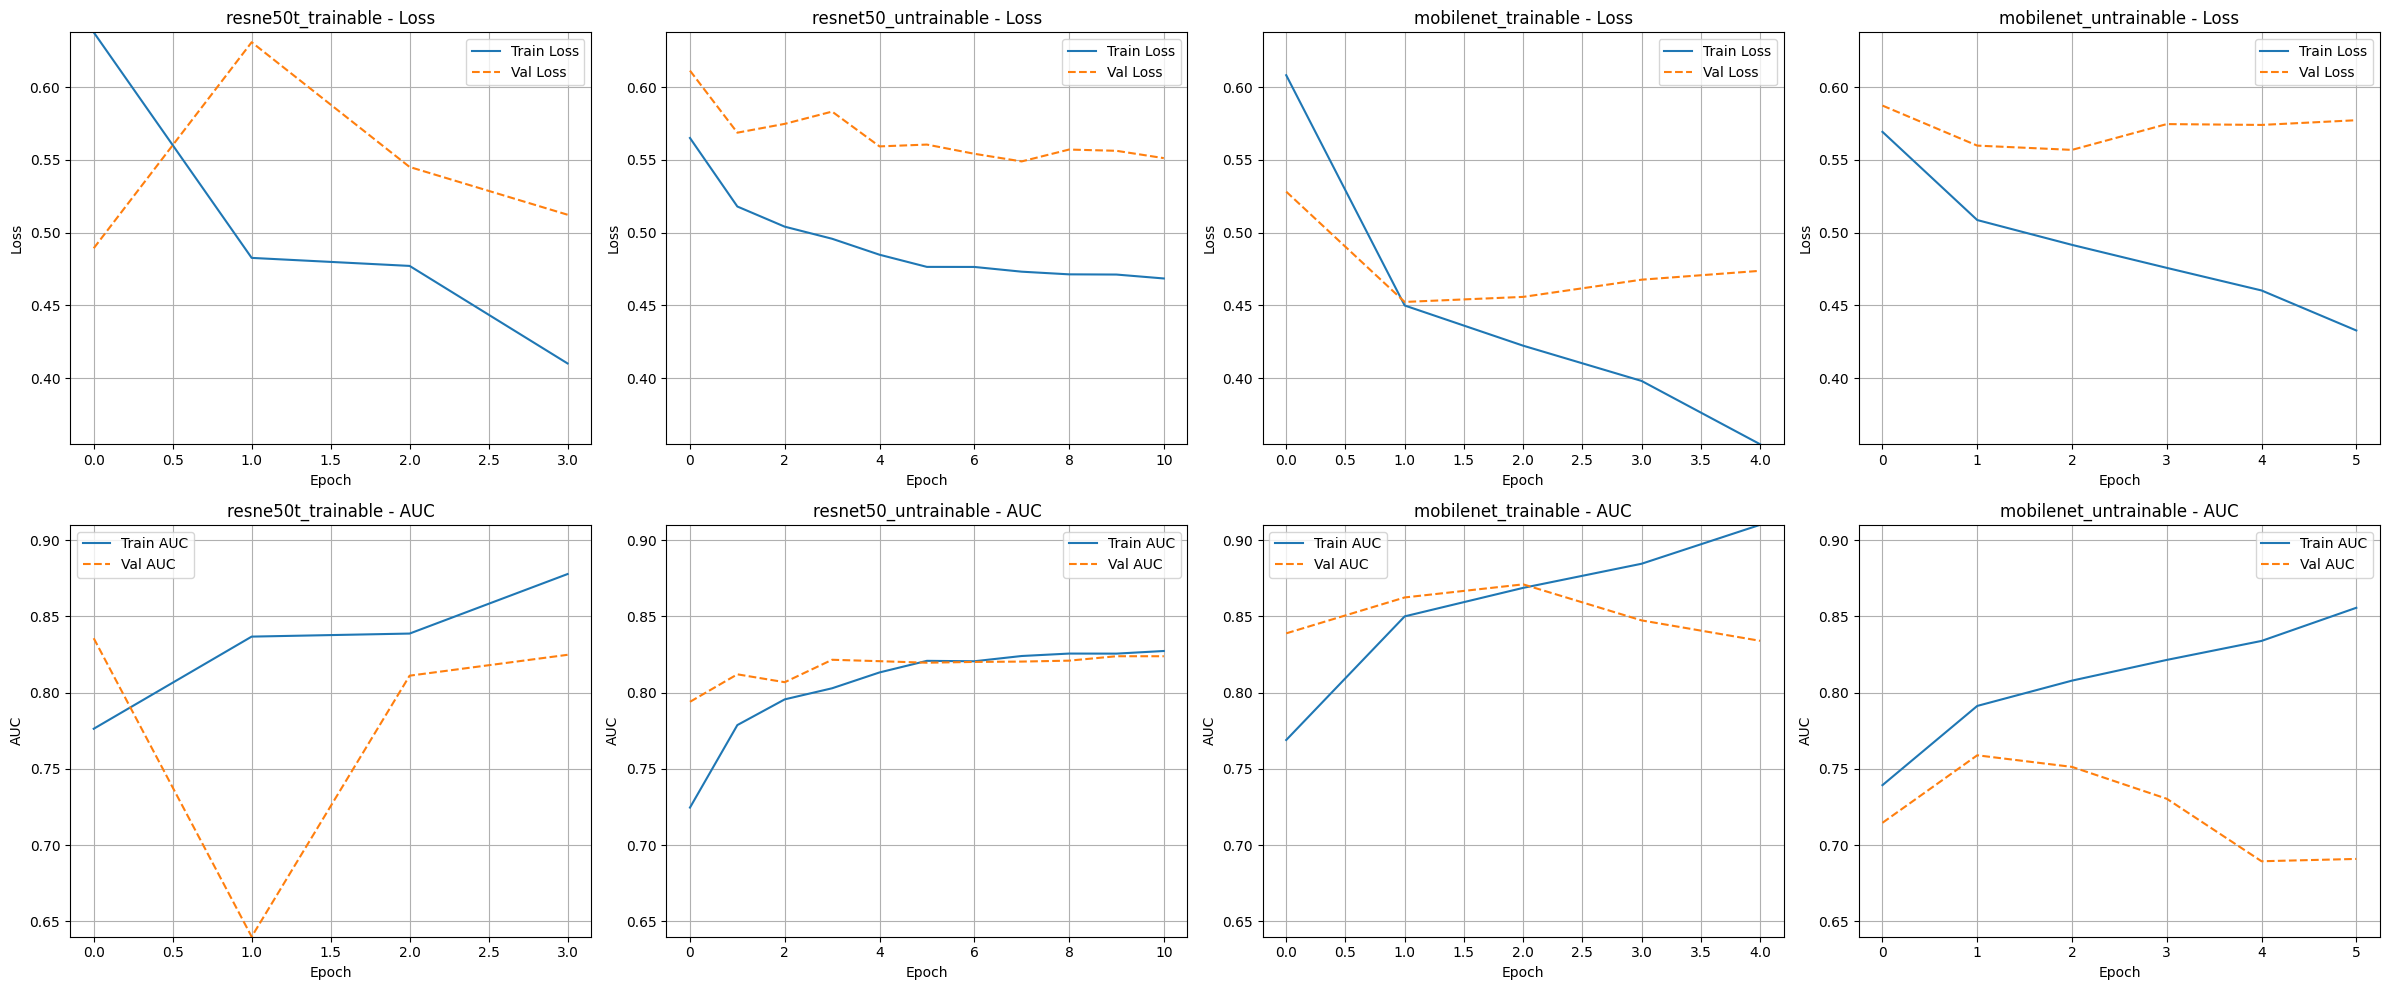

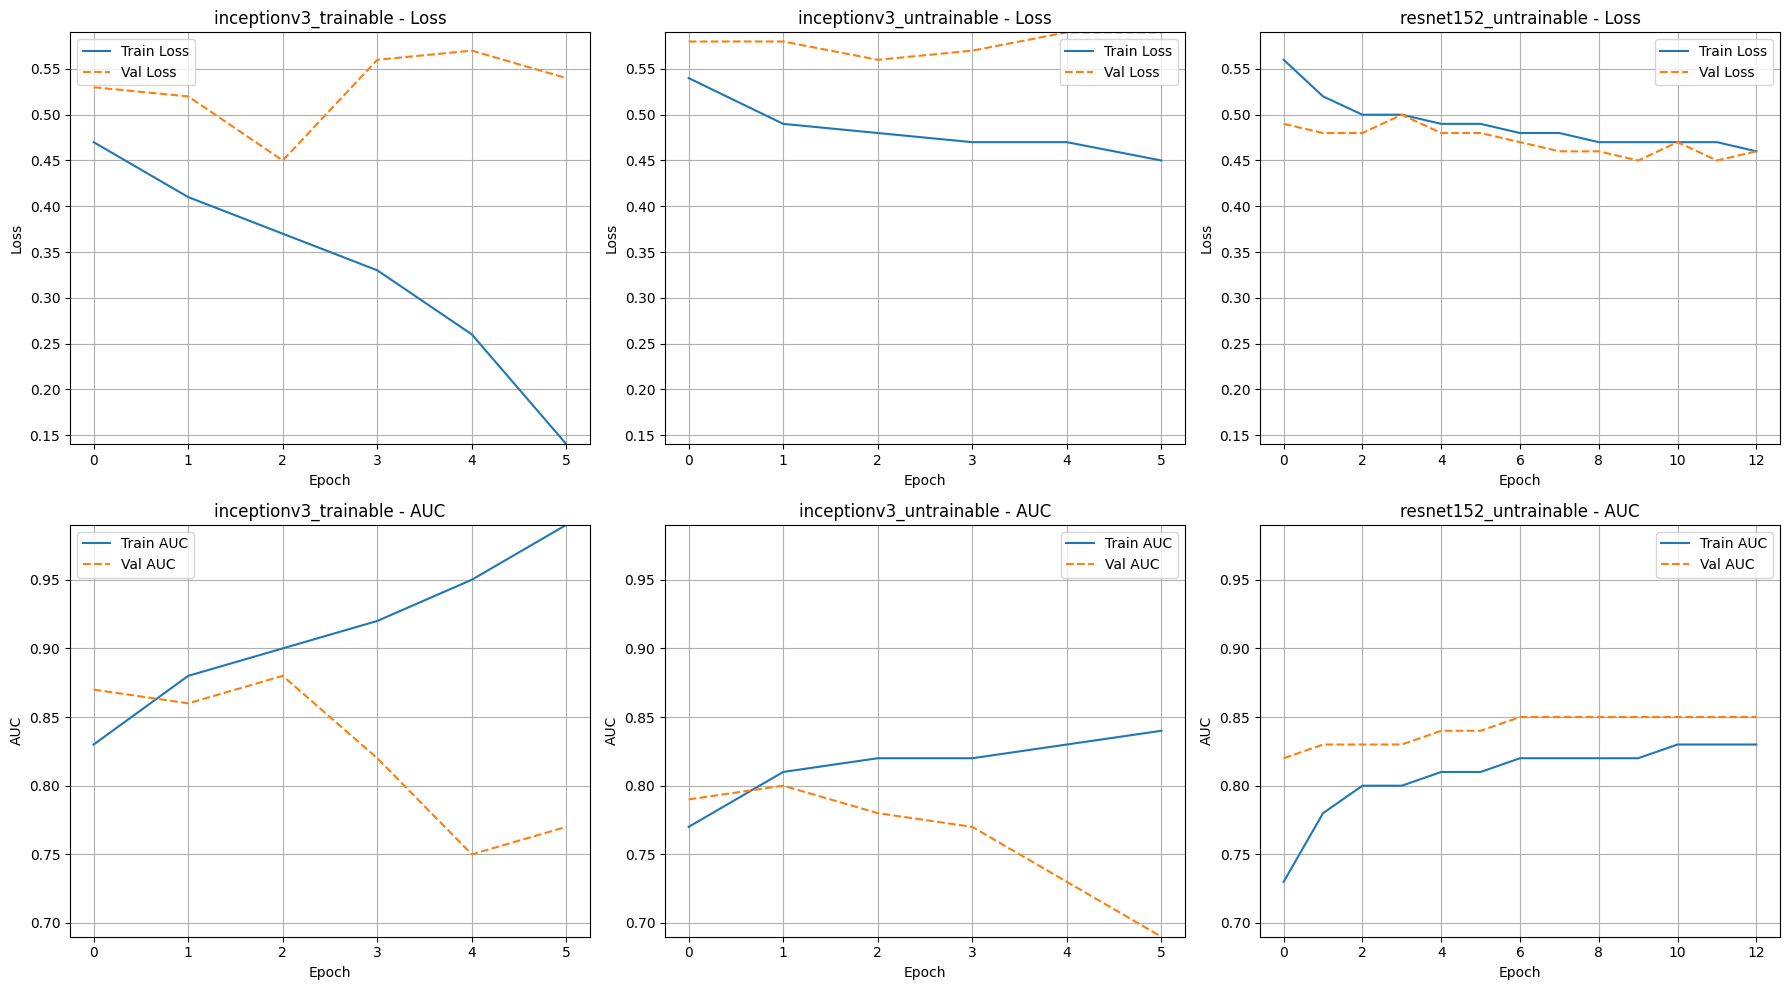

In [33]:
plot_individual_model_metrics([resne50t_trainable,resnet50_untrainable,mobilenet_trainable,mobilenet_untrainable],['resne50t_trainable','resnet50_untrainable','mobilenet_trainable','mobilenet_untrainable'])
plot_individual_model_metrics([inceptionv3_trainable,inceptionv3_untrainable,resnet152_untrainable],['inceptionv3_trainable','inceptionv3_untrainable','resnet152_untrainable'])

#### Observations :-
1. Trainable InceptionV3 gives the highest <b>validation AUC of 0.88</b>, followed by Trainable MobileNet (0.87), ResNet152 with frozen layers (0.85) and ResNet50 with frozen layers (0.82)
5. Other models like trainable ResNet50, MobileNet with frozen layers and InceptionV3 with frozen layers are overfitting on the training set!

# Conclusion

<b>Out of all the models trained, the highest validation AUC that we got without overfitting on the training set is that of a 5-layer-deep CNN model with GlobalMaxPooling layer at 7th epoch</b>

We will select this model as a final model for further <b>threshold caliberation</b> and <b>testing</b> purposes!